## Info

## Importing libraries

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# from matplotlib import colors
import seaborn as sns
# import plotly_express as px

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score, ConfusionMatrixDisplay, classification_report, cohen_kappa_score, make_scorer, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz


# import missingno as msno

#Use case
from PIL import Image
import glob
import numpy as np

#aula 05
from sklearn.datasets import fetch_openml #importando o open ML

## AULA 01 - MODELOS DE CLASSIFICAÇÃO

### Reading data

In [60]:
dados = pd.read_excel('../data/gaf_esp.xlsx')
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


### Exploring data

In [61]:
dados.shape

(100, 3)

In [62]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Comprimento do Abdômen,100.0,4.9362,3.343806,0.50,1.6925,4.5,8.2,10.0
Comprimento das Antenas,100.0,5.3824,2.296001,0.89,3.7750,5.5,7.0,9.7


In [63]:
dados.groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

### Visualizing data

Scatter

<AxesSubplot:xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

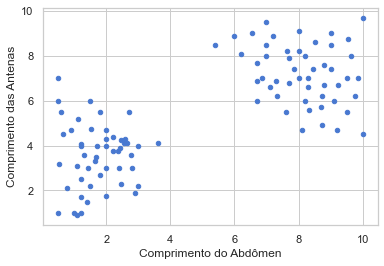

In [64]:
dados.plot.scatter(x='Comprimento do Abdômen', y='Comprimento das Antenas')

### Spliting training and testing data

In [65]:
x = dados[['Comprimento do Abdômen', 'Comprimento das Antenas']]
y = dados['Espécie']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

### Evaluating "stratify"

In [67]:
list(y_train).count('Gafanhoto'), list(y_train).count('Esperança')

(40, 40)

### Creating and training model
KNeighborsClassifier

In [68]:
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

In [69]:
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predicting

In [70]:
#TEST
modelo_classificador.predict([[8, 6]])

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Esperança'], dtype=object)

### Evaluating model

In [71]:
y_predito = modelo_classificador.predict(x_test)

In [72]:
accuracy_score(y_true = y_test, y_pred = y_predito)

1.0

Assertividade de 100% é suspeita, pode sinalizar Overfitting e etc.

***

## AULA 02 - KNN, SVM

### Reading data

In [73]:
dados = pd.read_excel('../data/Recrutamento.xlsx')
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


### Exploring data

In [74]:
dados.shape

(215, 15)

Valores unicos do status

In [75]:
set(dados.status)

{'No', 'Yes'}

In [76]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [77]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### Checking null values

In [78]:
# msno.matrix(dados)

In [79]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<AxesSubplot:xlabel='status', ylabel='salary'>

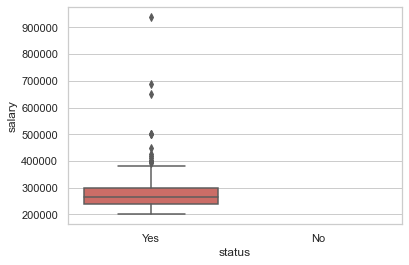

In [80]:
sns.boxplot(x='status', y='salary', data=dados, palette='hls')

#### Handling null values

In [81]:
dados['salary'].fillna(value=0, inplace=True)

In [82]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

#### Checking data distribution
- boxplot
- histogram

##### HSC_P

<AxesSubplot:xlabel='hsc_p'>

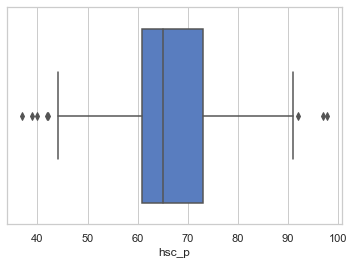

In [83]:
sns.boxplot(x=dados['hsc_p'])

<AxesSubplot:xlabel='hsc_p', ylabel='Count'>

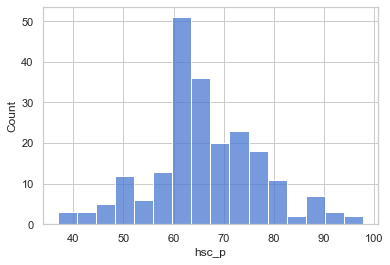

In [84]:
sns.histplot(data=dados, x='hsc_p')

Existem outliers mas não são tão representativos em termos de ocorrências, podemos ver no histograma que a frequência desses outliers é baixa.

Em termos gerais, disitruição "normal"

##### DEGREE_P

<AxesSubplot:xlabel='degree_p'>

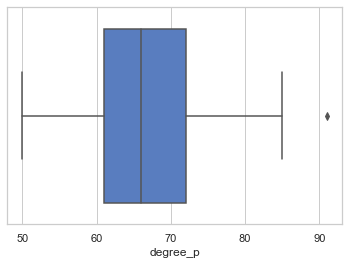

In [85]:
sns.boxplot(x=dados['degree_p'])

<AxesSubplot:xlabel='degree_p', ylabel='Count'>

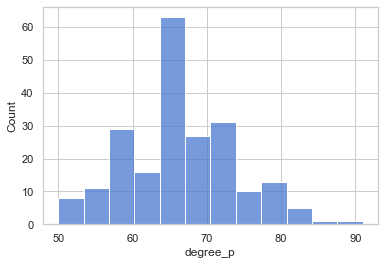

In [86]:
sns.histplot(data=dados, x='degree_p')

Em termos gerais, distribuição "normal"

##### MBA_P

<AxesSubplot:xlabel='mba_p'>

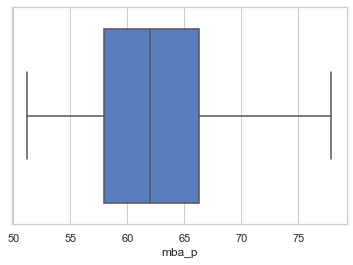

In [87]:
sns.boxplot(x=dados['mba_p'])

<AxesSubplot:xlabel='mba_p', ylabel='Count'>

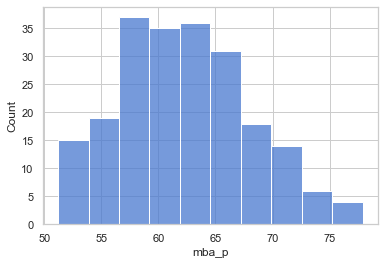

In [88]:
sns.histplot(data=dados, x='mba_p')

Em termos gerais, distribuição normal

##### SALARY

<AxesSubplot:xlabel='salary'>

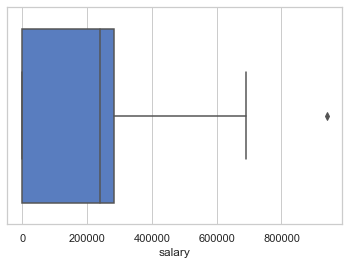

In [89]:
sns.boxplot(x=dados['salary'])

<AxesSubplot:xlabel='salary', ylabel='Count'>

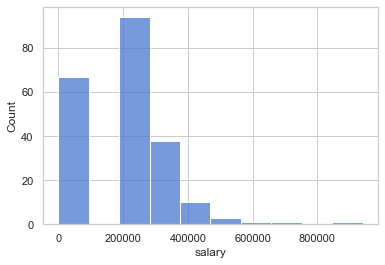

In [90]:
sns.histplot(data=dados, x='salary')

- Distribuição bem impacatada, distribuição um pouco fora da "normalidade"
- Assimétrica para esquerda

### Evaluating if candidates have more probability to get the job

#### Swarm

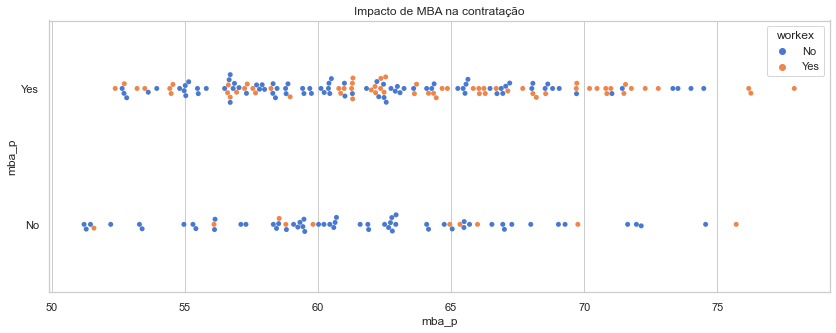

In [91]:
plt.figure(figsize=(14, 5))
sns.set_theme(style='whitegrid', palette='muted')
ax = sns.swarmplot(data=dados, x='mba_p', y='status', hue='workex')
ax.set(ylabel='mba_p')
plt.title('Impacto de MBA na contratação')
plt.show()

Variavel **mba** tem um impacto consideravel na contratação, vemos que a maioria das pessoas com especialização foram contratadas

#### Violin

In [92]:
# px.violin(dados, y='salary', x='specialisation', color='gender', box=True, points='all')

### Analysing data correlation and identifying potential features

<AxesSubplot:>

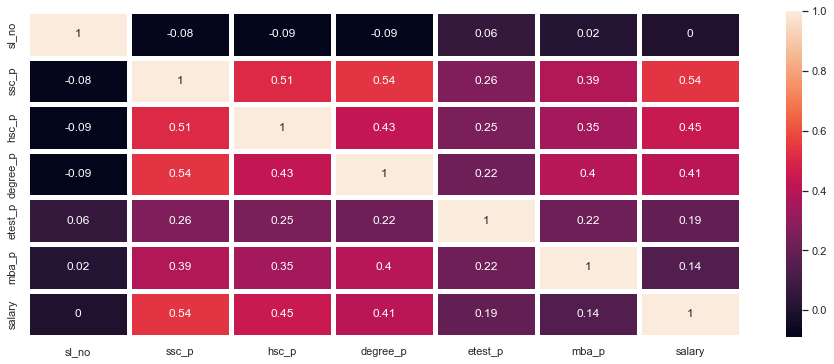

In [93]:
correlation_matriz = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(16, 6))

sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

Algumas variaveis categoricas estão como texto, precisamos arrumar.

### Formatting categorical features to numeric
- Label Encoder

In [94]:
colunas = ['gender', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()

for col in colunas:
    dados[col] = label_encoder.fit_transform(dados[col])

In [95]:
dados.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0


In [96]:
dummy_hsc_s = pd.get_dummies(dados['hsc_s'], prefix='dummy')
dummy_degree_t = pd.get_dummies(dados['degree_t'], prefix='dummy')

dados_dummy = pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)

In [97]:
dados_dummy.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,1,0,0,1,0,0


Removing datas that was normalized with dummies

In [98]:
dados_dummy.drop(['hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [99]:
dados_dummy.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0


### Checking heatmap correlation chart but now with new variavles (the ones with label encoder)

<AxesSubplot:>

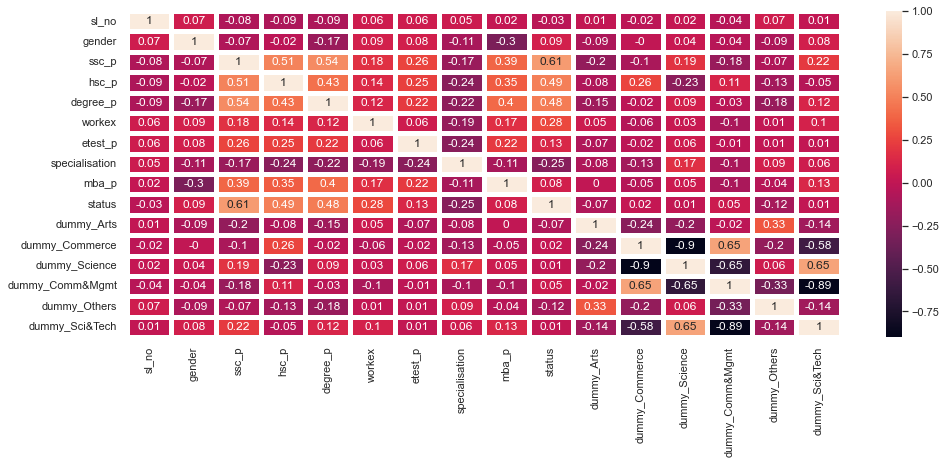

In [100]:
correlation_matriz = dados_dummy.corr().round(2)

fig, ax = plt.subplots(figsize=(16, 6))

sns.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)

### Creating KNN model

In [101]:
x = dados_dummy[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
y = dados_dummy['status']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

#### Normalizing features scalling

In [103]:
x.head(3)

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80


In [104]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

#### Analyzing model mean error for parameter K (vizinhos)

In [105]:
error = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    #predicting
    pred_i = knn.predict(x_test_escalonado)
    #metrics
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro médio')

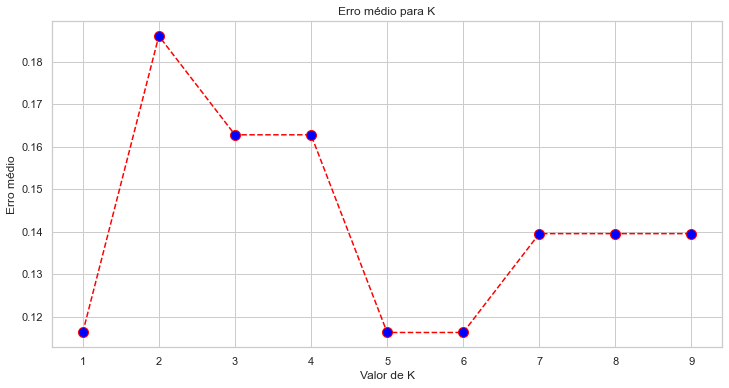

In [106]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Erro médio para K')
plt.xlabel('Valor de K')
plt.ylabel('Erro médio')

- valores 5 e 6 performaram melhor, não é interessante colocar o 1 pois o modelo trabalha com "vizinhoS" e não "vizinhO" (singular).
- dos dois valores é mais viável ficar com o valor 5 pois é impar, assim evitando empates

### KNN Model improved
- scalled
- encoded

In [107]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)
modelo_classificador.fit(x_train_escalonado, y_train)

y_predito = modelo_classificador.predict(x_test_escalonado)

#### Evaluating model

In [108]:
print(accuracy_score(y_test, y_predito))

0.8837209302325582


Performance boa, aceitável

### Creating SVM model

In [109]:
svm = Pipeline(
    [
        ('linear_svc', LinearSVC(C=1))
    ]
)

In [110]:
svm.fit(x_train_escalonado, y_train)

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [111]:
y_predito_svm = svm.predict(x_test_escalonado)

#### Evaluating SVM

In [112]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697


## AULA 03 - KMEANS e DBSCAN

### Reading data

In [113]:
dados = pd.read_csv('../data/mall.csv', sep=',')
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Limpeza dos dados

In [114]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Análise exploratório dos dados

In [115]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [116]:
dados['Annual Income (k$)'].median()

61.5

#### Analisando a distribuição

array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

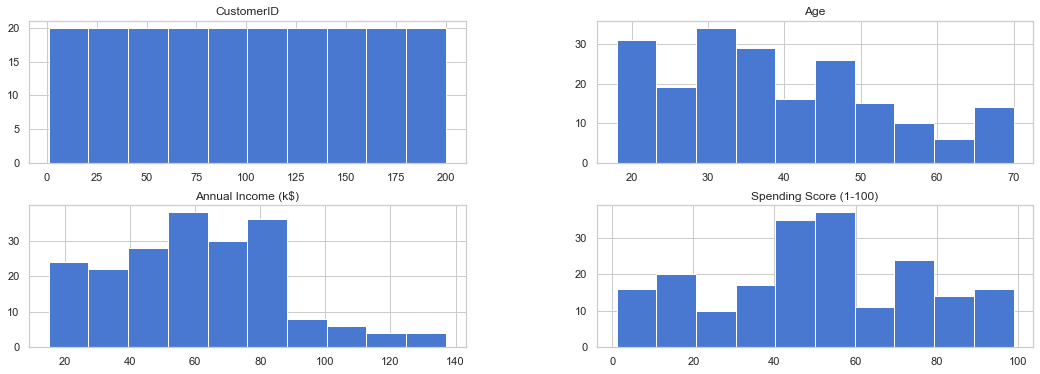

In [117]:
dados.hist(figsize=(18,6))

#### Correlação entre variáveis

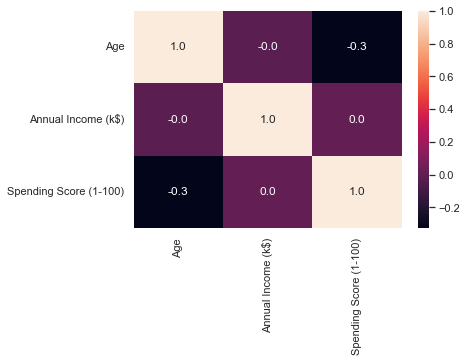

In [118]:
plt.figure(figsize=(6,4))
sns.heatmap(dados[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method='pearson'), annot=True, fmt='.1f');

#### Proporção de generos

In [119]:
dados['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

#### Cruzando variavel de genero com todas as outras variaveis

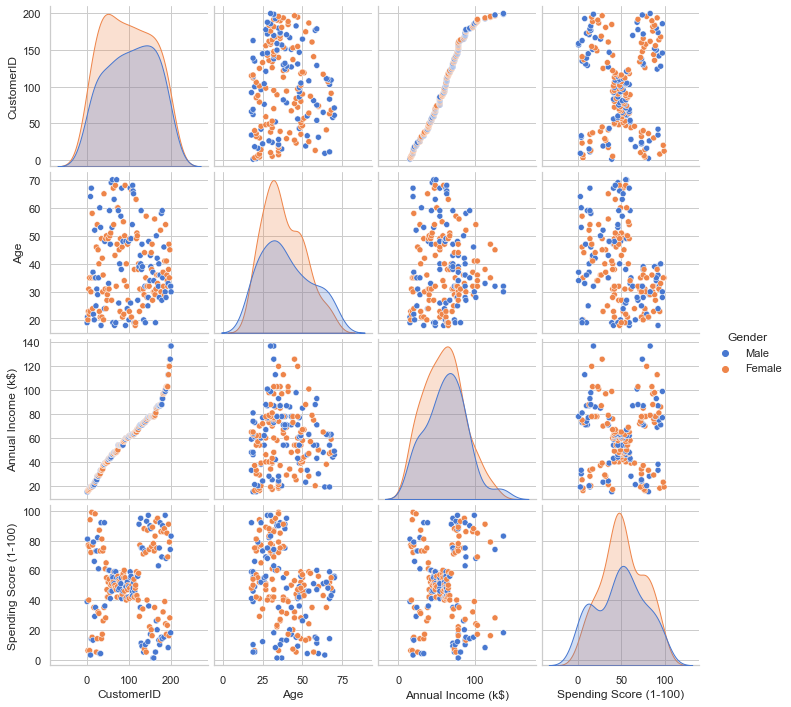

In [120]:
sns.pairplot(dados, hue='Gender')
plt.show()

Grafico Spending Score x Annual Income parece que tem grupos bem definidos na nuvem, nos proximos passos vamos explorar isso.

### Feature scalling
Validando se feature scalling faz diferença ou não (Feature engineering)

In [121]:
scaler = StandardScaler() 
#scaler = MinMaxScaler() 
scaler.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

StandardScaler()

In [122]:
dados_Escalonados = scaler.transform(dados[['Annual Income (k$)','Spending Score (1-100)']])
dados_Escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Criando os agrupamentos

#### Modelo K-Means
- sensível a outliers

##### Sem feature scalling

In [123]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans = KMeans(n_clusters=6,random_state=0) #definindo os hiperparametros do algoritmo (definir o número de grupo = cluster)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


##### Com feature scalling

In [124]:
# Definindo o modelo de clusterizacao. K-MEANS com 6 clusters
kmeans_escalonados = KMeans(n_clusters=6,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados_Escalonados)

#Salvando os centroides de cada cluster
centroides_escalonados = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels_escalonado = kmeans.predict(dados_Escalonados)

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [125]:
dados_Escalonados = pd.DataFrame(dados_Escalonados, columns = ['Annual Income (k$)','Spending Score (1-100)'])
dados_Escalonados.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [126]:
dados_Escalonados['Grupos'] = kmeans_labels_escalonado
dados_Escalonados.head()

,Annual Income (k$),Spending Score (1-100),Grupos
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,0


In [127]:
dados['Grupos'] = kmeans_labels
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Grupos
0,1,Male,19,15,39,5
1,2,Male,21,15,81,0
2,3,Female,20,16,6,5
3,4,Female,23,16,77,0
4,5,Female,31,17,40,5


##### Analisando previsão e centroids

In [128]:
pd.Series(kmeans_labels).value_counts()

3    81
2    35
1    28
5    23
0    22
4    11
dtype: int64

In [129]:
centroides #espaço tridimensional (salário e score de gasto)


array([[ 25.72727273,  79.36363636],
       [ 78.03571429,  81.89285714],
       [ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [108.18181818,  82.72727273],
       [ 26.30434783,  20.91304348]])

##### Cluster com feature scalling

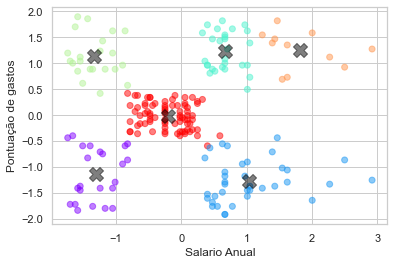

In [130]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados_Escalonados[['Annual Income (k$)']],dados_Escalonados[['Spending Score (1-100)']], c=kmeans_labels_escalonado, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# plotando os centroides
plt.scatter(centroides_escalonados[:, 0], centroides_escalonados[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

##### Cluster sem feature scalling

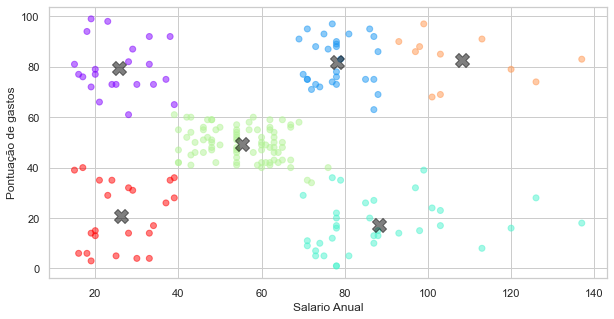

In [131]:
# PONTOS
plt.scatter(dados[['Annual Income (k$)']], dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')

# CENTROIDS
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

##### Metódo "COTOVELO" - Escolhendo o melhor número de clusters

[1, 2, 3, 4, 5, 6, 7, 8, 9]


C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarni

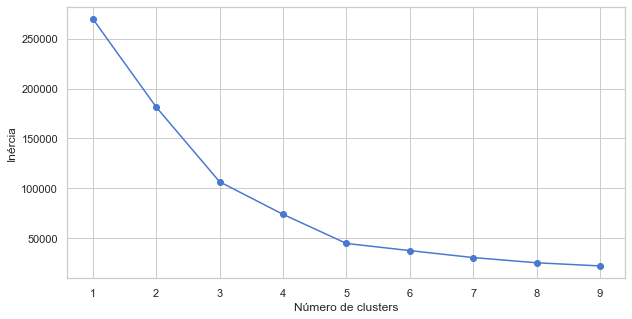

In [132]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))
print(k)

# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmeans.inertia_) #calculo do erro do k-mens (mudar o centroide dos dados)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

De acordo com o metódo de cotovelo, o número mais viável de clusters seria o 5, pois é o que tem o menor erro da soma quadrática.
Nesse método os extremos não fazem sentido, 1 e 9 por exemplo.
Sempre é mais viável pegar quando a curva começa a "estabilizar", nesse caso 5.

##### Média de idade dos grupos

In [133]:
dados.groupby('Grupos')['Age'].mean()

Grupos
0    25.272727
1    32.785714
2    41.114286
3    42.716049
4    32.454545
5    45.217391
Name: Age, dtype: float64

##### Média de renda anual dos grupos

In [134]:
dados.groupby('Grupos')['Annual Income (k$)'].mean()

Grupos
0     25.727273
1     78.035714
2     88.200000
3     55.296296
4    108.181818
5     26.304348
Name: Annual Income (k$), dtype: float64

Podemos notar que após 3 ou 5 clusters a soma do erro quadratico tem uma redução na forma com a qual a função está decrescendo. Assim podemos adotar 5 clusters. Checando os resultados para 5 clusters:

In [135]:
# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=5,random_state=0)

#Implementando o K-Means nos dados:
kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_labels = kmeans.predict(dados[['Annual Income (k$)','Spending Score (1-100)']])

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


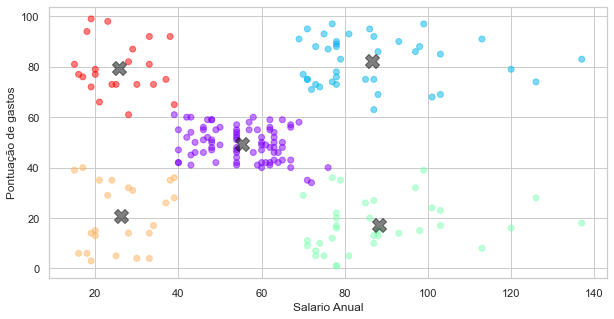

In [136]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [137]:
dados_grupo_1 = dados[dados['Grupos'] == 1]
print('Grupo 1:\n Média: {}\n'.format(dados_grupo_1['Annual Income (k$)'].mean()))

dados_grupo_2 = dados[dados['Grupos'] == 2]
print('Grupo 2:\n Média: {}\n'.format(dados_grupo_2['Annual Income (k$)'].mean()))

dados_grupo_3 = dados[dados['Grupos'] == 3]
print('Grupo 3:\n Média: {}\n'.format(dados_grupo_3['Annual Income (k$)'].mean()))

dados_grupo_4 = dados[dados['Grupos'] == 4]
print('Grupo 4:\n Média: {}\n'.format(dados_grupo_4['Annual Income (k$)'].mean()))

Grupo 1:
 Média: 78.03571428571429

Grupo 2:
 Média: 88.2

Grupo 3:
 Média: 55.2962962962963

Grupo 4:
 Média: 108.18181818181819



Com esse resultado é possível extender a análise e coemçar a entender melhor cada perfil (cada grupo) através de estatisticas especfiicas para cada grupo e etc. E assim no final traçar perfil de grupo alvo.

#### Modelo DBSCAN
- funciona melhor com outliers
- não identifica grupos dentro de grupos

In [138]:
# CRIANDO MODELO
dbscan = DBSCAN(eps=10, min_samples=8)

# AJUSTANDO OS DADOS
dbscan.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

# PEGANDO AS LABELS IDENTIFICADADS
dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

##### Labels com -1 foram classificados como outliers
- Roxos no próximo gráfico

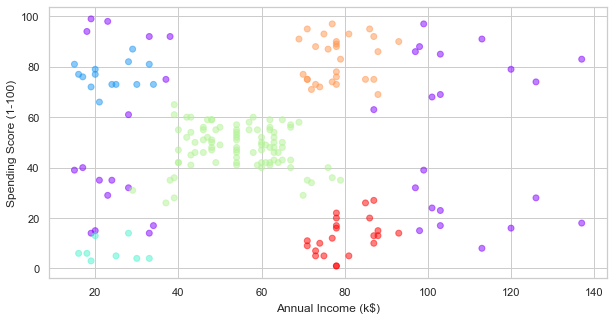

In [139]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

##### Visualizando sem os outliers

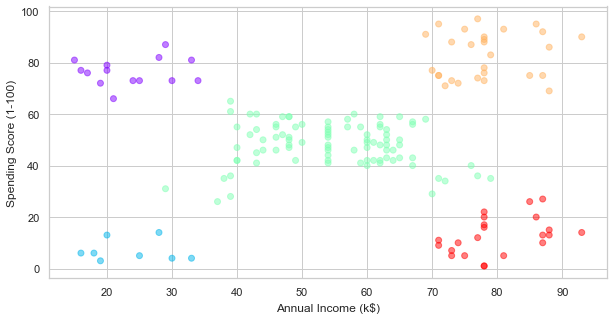

In [140]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Checando a quantidade de valores que foram classificados como Outliers:

In [141]:
list(mascara).count(False)

38

#### Como validar uma clusterização?
Temos dois tipos:

Interna: Quanto bom foi o meu agrupamento?
Externa: Como parecido estão os meus dois algoritmos comparados?
Avaliando o Desempenho dos Algoritmos
Tipo Externo:
(a) Usando o Adjusted Rand Index

Compara o desempenho quando forem fornecidos datasets com labels geradas de forma aleatória. Quando essas labels estão muito diferente, o valor se aproxima de 0, o que sugere um resultado negativo, ou seja, clusters não próximos.

Comparação entre K-Means e DBSCAN:

In [142]:
adjusted_rand_score(kmeans_labels,dbscan_labels)

0.7151933782093212

##### Tipo interno:
(b) Avaliando a métrica de Silhouette

Mede o formato do cluster obtido: avalia a distância entre os centros dos clusters, nesse caso, queremos maximizar as distâncias)

Valores próximos a -1, significa clusters ruins, próximo a 1, clusters bem separados.

KMEANS:

In [143]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],kmeans_labels)


0.553931997444648

DBSCAN:



In [144]:
silhouette_score(dados[['Annual Income (k$)','Spending Score (1-100)']],dbscan_labels)


0.36328873885121793

***

#### Use case - Segmentação de imagens
Cancer de mama

Segmentação de Imagens de Câncer de Mama
Vamos usar o dataset mini-MIAS disponível em http://peipa.essex.ac.uk/info/mias.html.

Este dataset possui 322 imagens de mamografias.

A Segmentação de Imagem envolve em colorir de uma mesma cor objetos ou partes de interesse. No caso do nosso dataset, iremos usar a segmentação de imagem para reduzir a resolução, aumentando o contraste entre diferentes regiões dos tecidos representados na imagem de mamografia.

O dataset é mais detalhado, possuindo inclusive tipos de câncer e anormalidades que ocorrem em cada uma das imagens.

Vamos apenas aplicar o K-Means em algumas imagens para observar o resultado:

In [145]:
# Carregando as imagens
img_G = mpimg.imread('../data/mdb001.pgm') # Tipo G
img_D = mpimg.imread('../data/mdb003.pgm') # Tipo D
img_F = mpimg.imread('../data/mdb005.pgm') # Tipo F

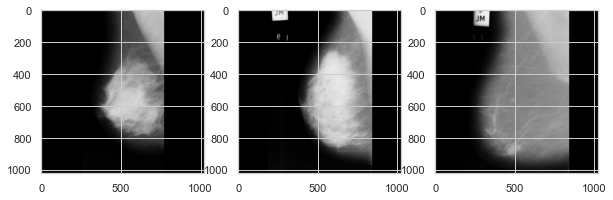

In [146]:
# Plotando as imagens

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [147]:
# Essa função usa o Kmeans como um filtro de segmentação de imagem

def filtro_kmeans(img, clusters):
    vectorized = img.reshape((-1,1))
    kmeans = KMeans(n_clusters=clusters, random_state = 0, n_init=5)
    kmeans.fit(vectorized)
    
    centers = np.uint8(kmeans.cluster_centers_)
    segmented_data = centers[kmeans.labels_.flatten()]
    
    segmented_image = segmented_data.reshape((img.shape))
    return(segmented_image)

In [148]:

clusters = 3

img_G_segmentada = filtro_kmeans(img_G, clusters) # Tipo G
img_D_segmentada = filtro_kmeans(img_D, clusters) # Tipo D
img_F_segmentada = filtro_kmeans(img_F, clusters) # Tipo F

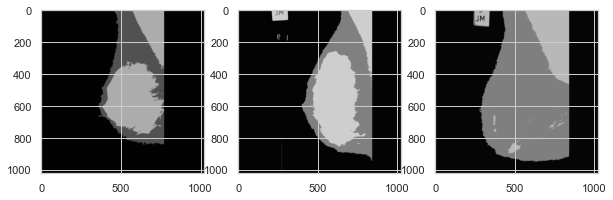

In [149]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
im1 = axs[0].imshow(img_G_segmentada, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D_segmentada, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmentada, cmap='gray', vmin=0, vmax=255)
plt.show()

## AULA 04 - MODELOS BASEADOS EM ÁRVORES

### Reading data

In [150]:
#subindo a base de dados
dados = pd.read_csv("../data/card_transdata.csv", sep=",")
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [151]:
# SEPARANDO DADOS
x = dados.drop(columns=['fraud'])
y = dados['fraud']

In [152]:
# SEPARANDO BASE TREINO E TESTE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

### Criando Modelo Decision Tree

In [153]:
dt = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth=2)

dt.fit(x_train, y_train)

y_predito = dt.predict(x_test)

[Text(0.5, 0.8333333333333334, 'x[2] <= 4.0\nentropy = 0.428\nsamples = 800000\nvalue = [730078, 69922]'),
 Text(0.25, 0.5, 'x[0] <= 100.004\nentropy = 0.169\nsamples = 717444\nvalue = [699473, 17971]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.052\nsamples = 681683\nvalue = [677647, 4036]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.965\nsamples = 35761\nvalue = [21826, 13935]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\nentropy = 0.951\nsamples = 82556\nvalue = [30605, 51951]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.541\nsamples = 29007\nvalue = [25406, 3601]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.46\nsamples = 53549\nvalue = [5199, 48350]')]

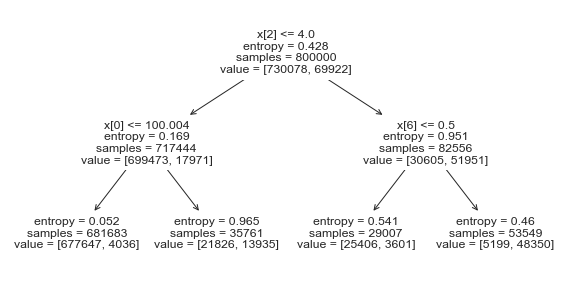

In [154]:
plot_tree(dt)

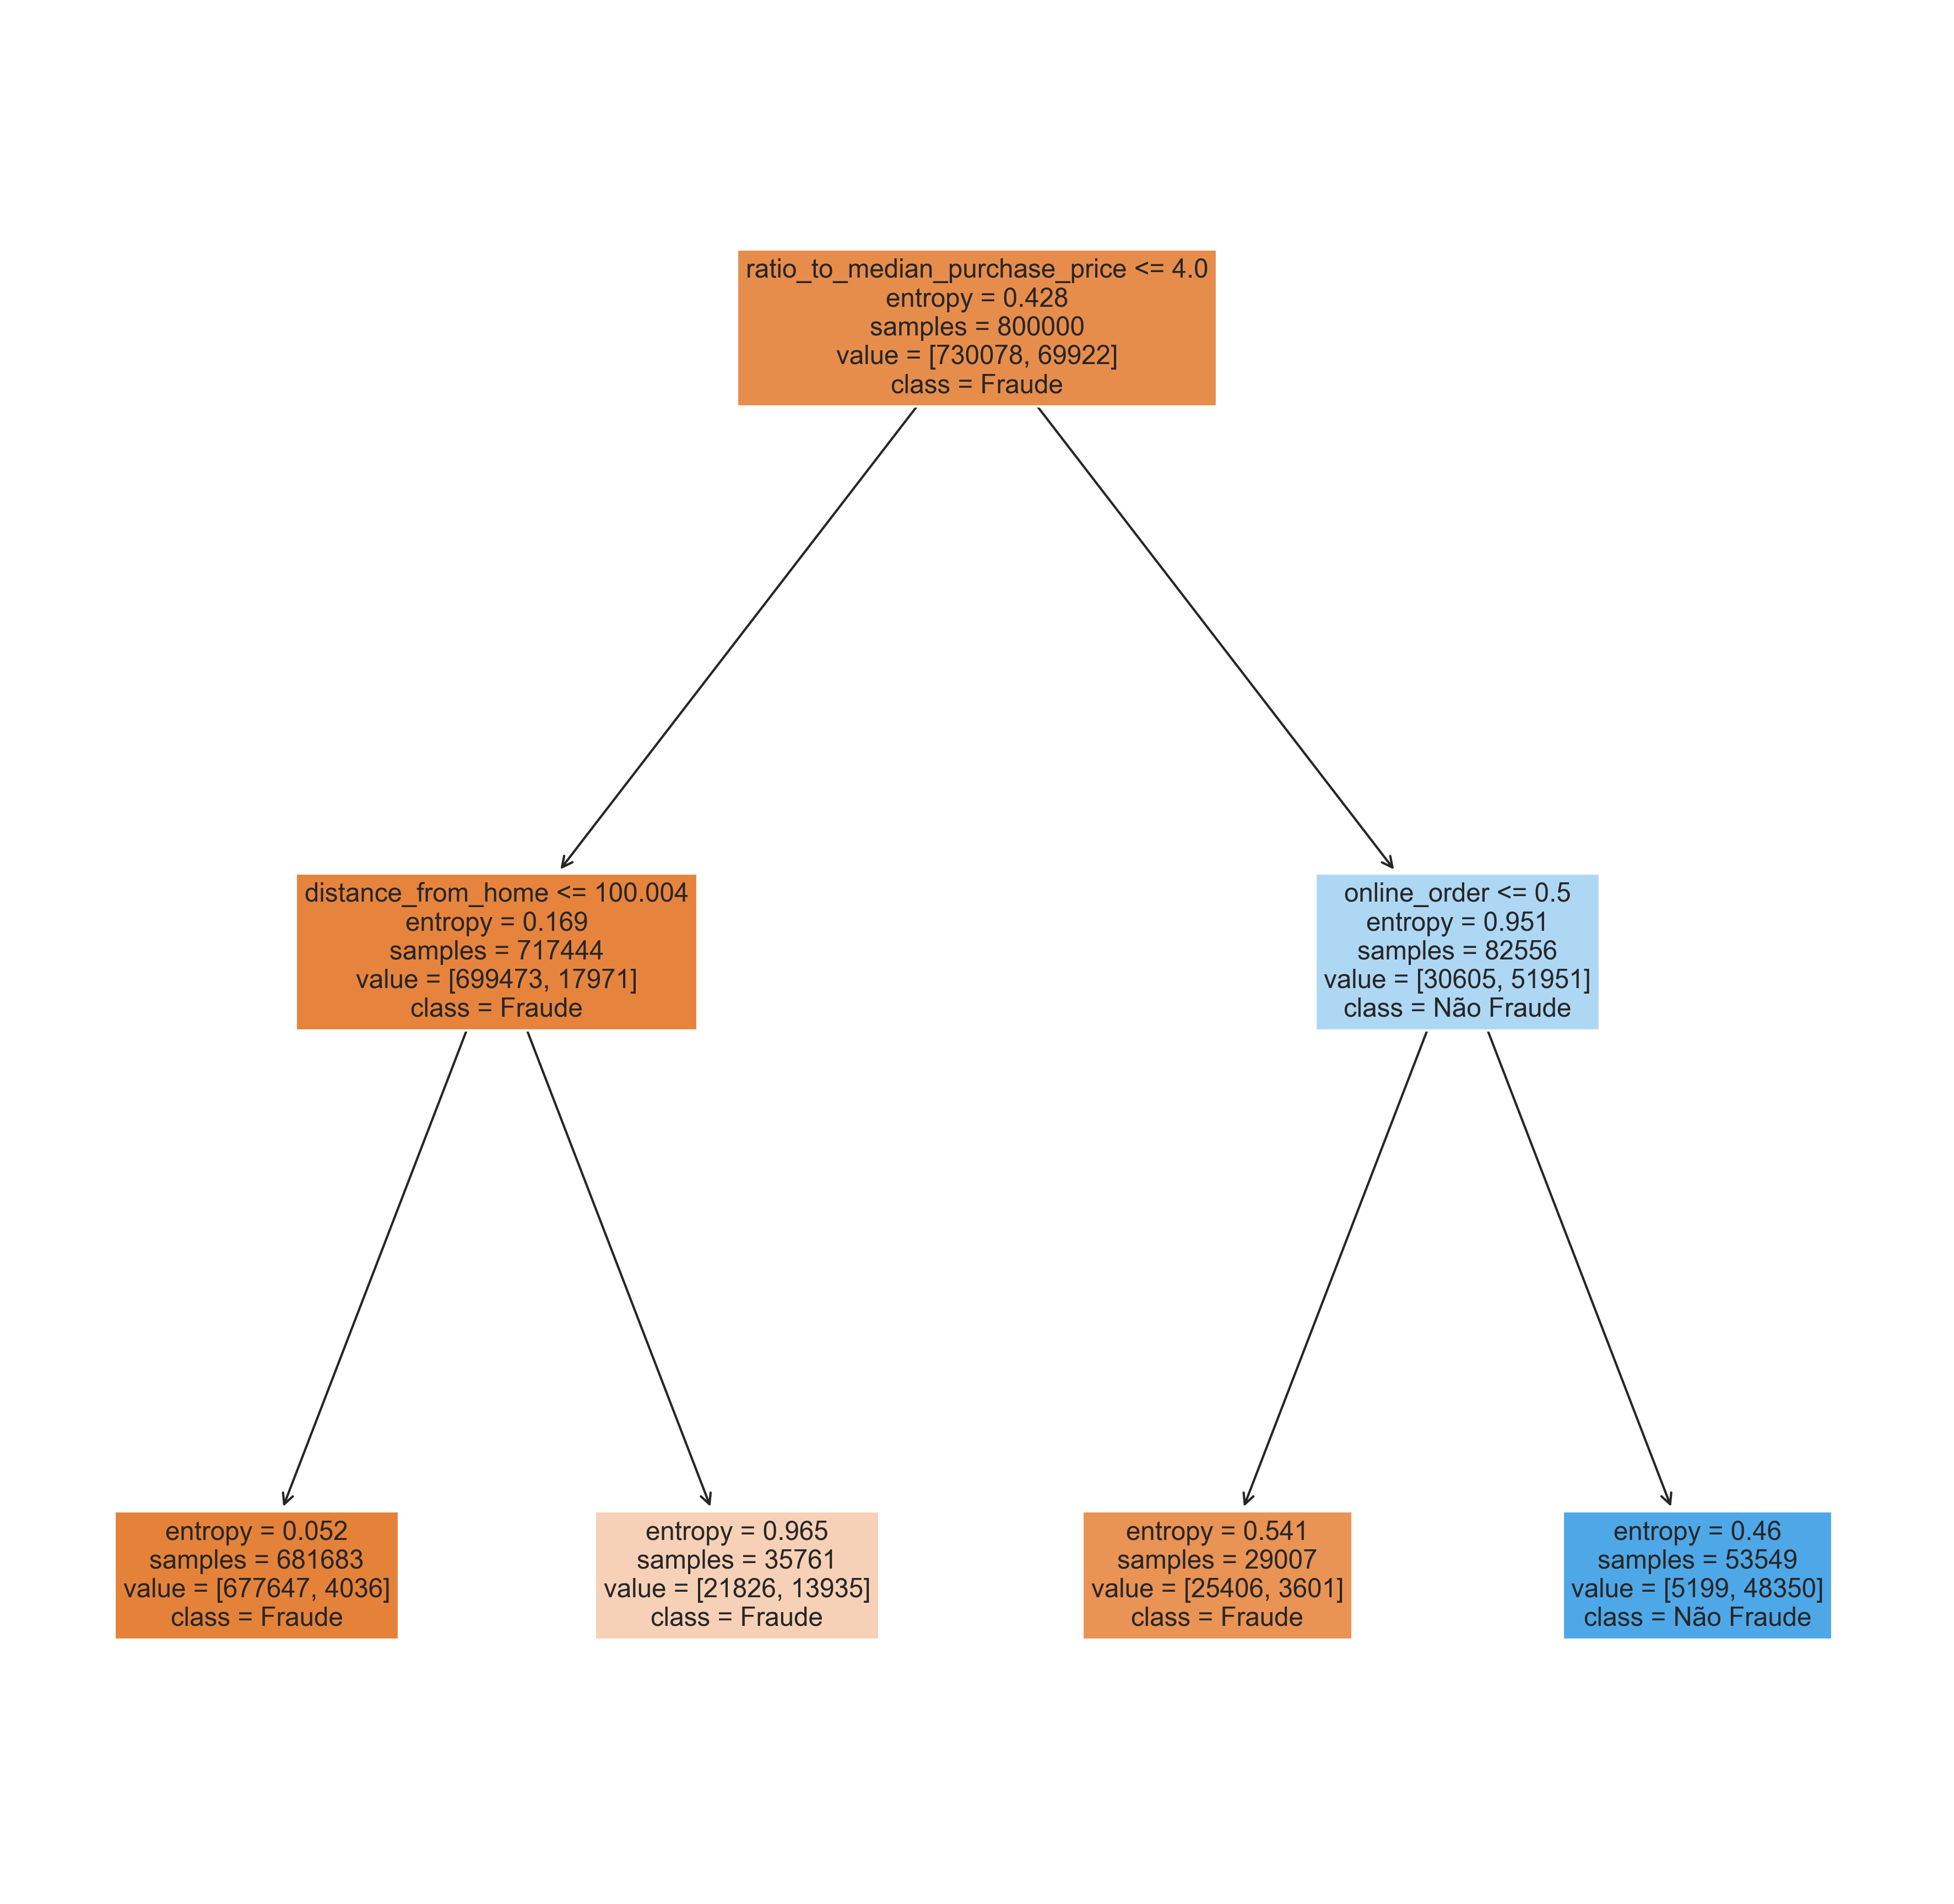

In [155]:

class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)

plot_tree(dt,
               feature_names = label_names, 
               class_names=class_names,
               filled = True)

fig.savefig('imagename.png')

In [156]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito)) #relatório de validação das métrica de desempenho.

0.96675


### Criando Modelo Random Forest

In [157]:
rf = RandomForestClassifier(n_estimators=5, max_depth = 2,  random_state=7) 
rf.fit(x_train, y_train) 

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [158]:

estimator = rf.estimators_
estimator

[DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=327741615),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=976413892),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1202242073),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1369975286),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1882953283)]

In [159]:
y_predito_random_forest = rf.predict(x_test)
y_predito_random_forest

array([0., 0., 0., ..., 0., 0., 0.])

In [160]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predito_random_forest)) #relatório de validação das métrica de desempenho.

0.95339


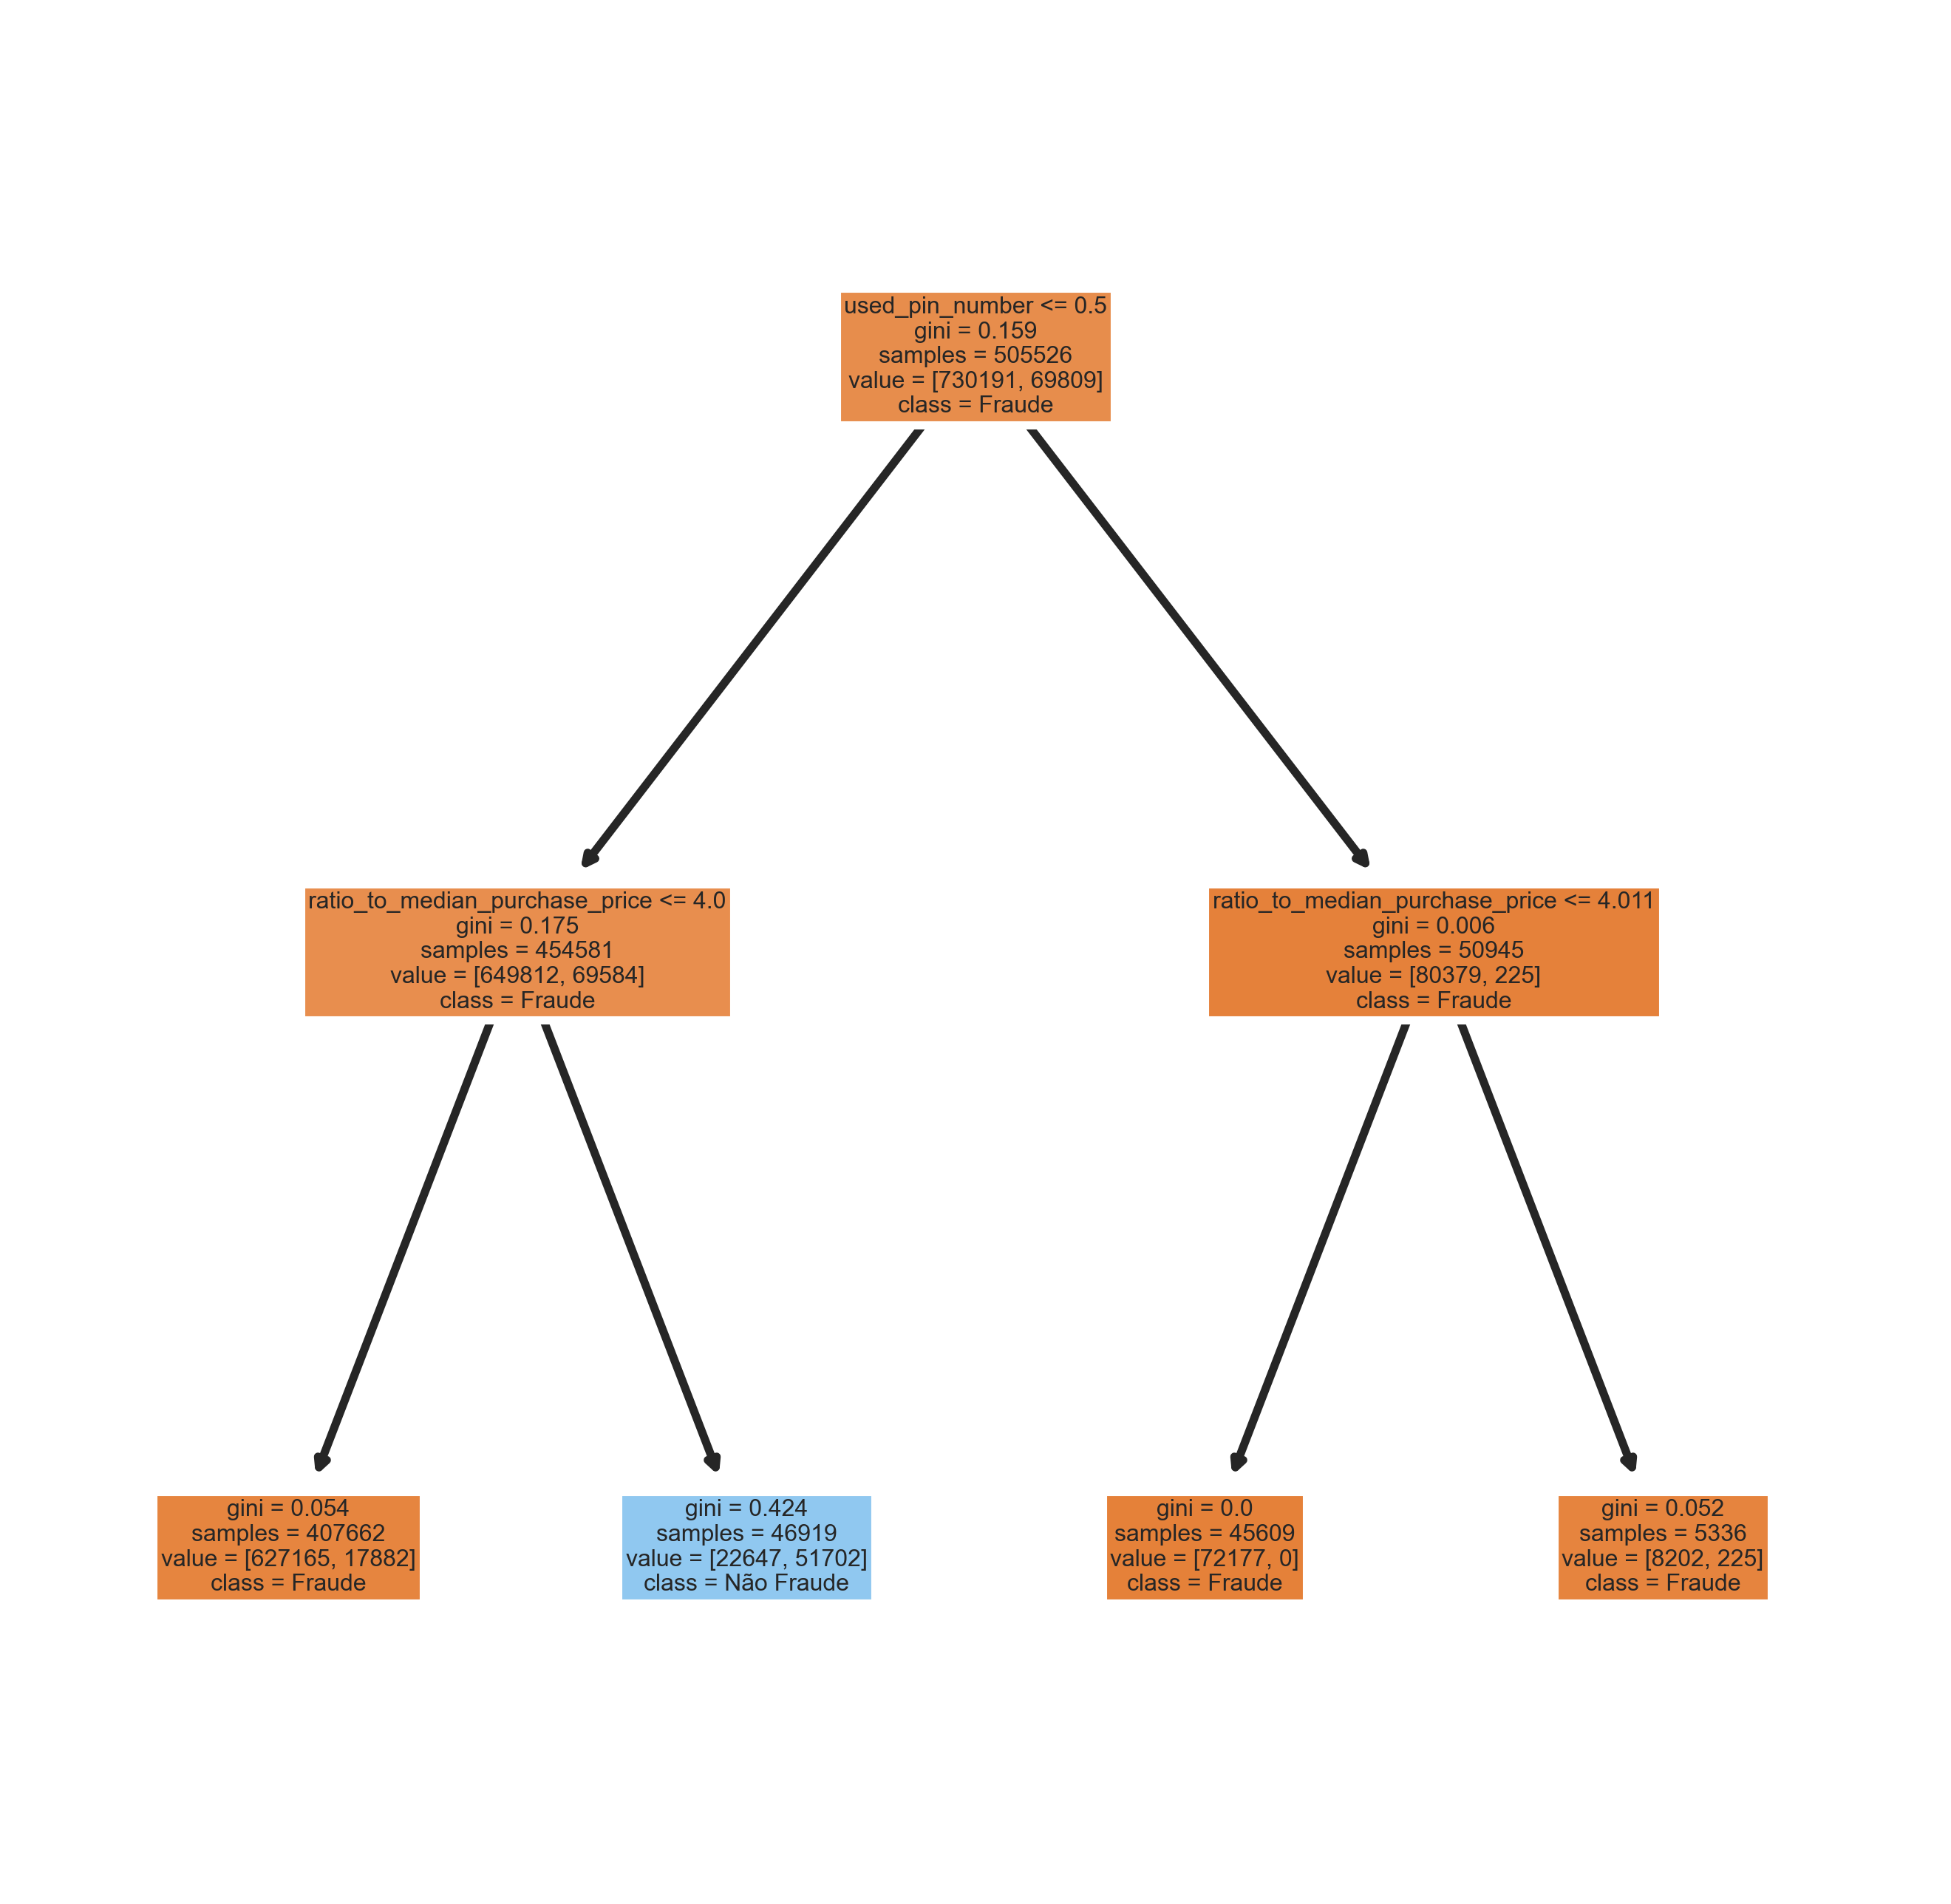

In [161]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(rf.estimators_[0],
               feature_names = label_names, 
               class_names=class_names,
               filled = True);
fig.savefig('rf_individualtree.png')

#### Plotando todas as árvores geradas:

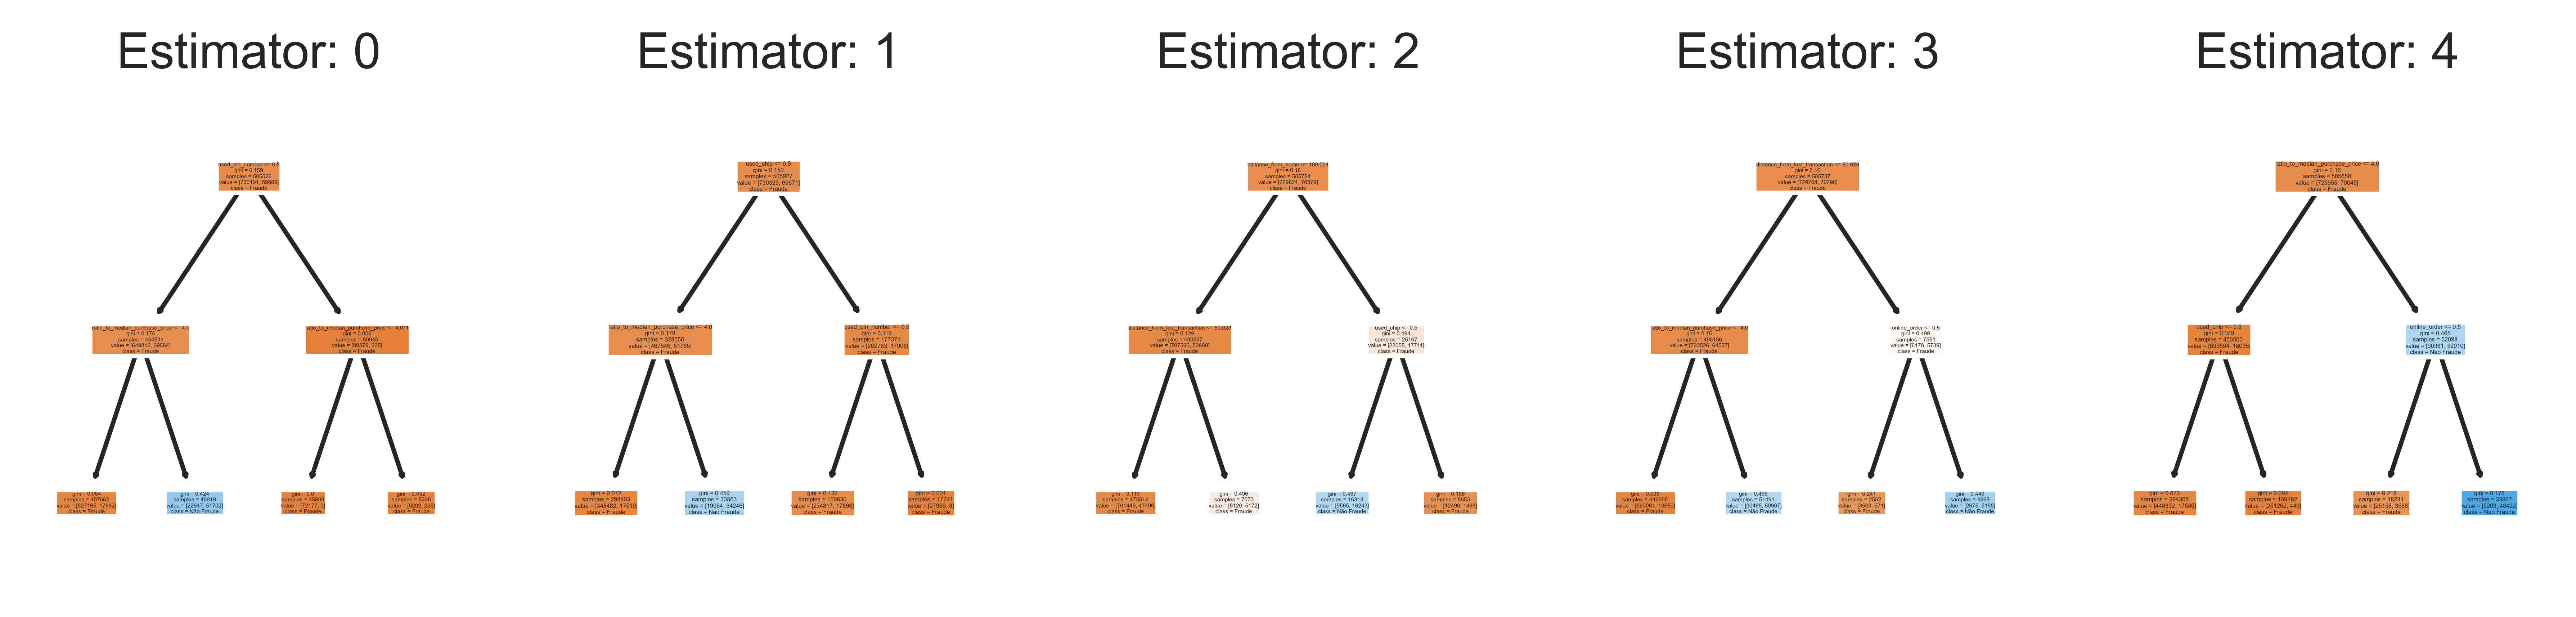

In [162]:

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    plot_tree(rf.estimators_[index],
                   feature_names = label_names, 
                   class_names=class_names,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [163]:

print (rf.score(x_train, y_train)) 
print(rf.score(x_test, y_test))

0.95321875
0.95339


O score nos dá uma visão da precisão média da floresta aleatória nos dados fornecidos

## AULA 05 - VALIDAÇÃO CRUZADA E PIPELINE NO SKLEARN

### Reading data
direct from openML

In [164]:
dados = fetch_openml(data_id=1523)
tabela_dados = pd.DataFrame(data=dados['data'])
tabela_dados

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,V1,V2,V3,V4,V5,V6
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


### Transformando a base de dados:

In [165]:
classes = {'1':'Disk Hernia',
           '2':'Normal',
           '3':'Spondylolisthesis'}

classes['1'], classes['2'], classes['3']


('Disk Hernia', 'Normal', 'Spondylolisthesis')

In [166]:
tabela_dados['diagnostic'] = [classes[target] for target in dados.target]
tabela_dados.head()

,V1,V2,V3,V4,V5,V6,diagnostic
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia


### Passo 2: Análise exploratória dos dados

In [167]:
tabela_dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   V1          310 non-null    float64
 1   V2          310 non-null    float64
 2   V3          310 non-null    float64
 3   V4          310 non-null    float64
 4   V5          310 non-null    float64
 5   V6          310 non-null    float64
 6   diagnostic  310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [168]:
len(tabela_dados)

310

In [169]:
tabela_dados.describe()


,V1,V2,V3,V4,V5,V6
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,129.834041,49.431864,125.742386,121.429566,163.071041,418.543082


Como está a média dos dados?

In [170]:
tabela_dados.groupby('diagnostic').mean()


,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [171]:
tabela_dados.groupby('diagnostic').describe()


V1                                              \
                   count       mean        std        min        25%   
diagnostic                                                             
Disk Hernia         60.0  47.638407  10.697131  26.147921  41.018099   
Normal             100.0  51.685244  12.368161  30.741938  42.817849   
Spondylolisthesis  150.0  71.514224  15.109337  37.903910  60.658136   

                                                        V2             ...  \
                         50%        75%         max  count       mean  ...   
diagnostic                                                             ...   
Disk Hernia        46.416169  53.922329   74.433593   60.0  17.398795  ...   
Normal             50.123115  61.470097   89.834676  100.0  12.821414  ...   
Spondylolisthesis  72.149306  81.075893  129.834041  150.0  20.748038  ...   

                           V5                 V6                        \
                          75%         max  count       mean        std   
diagnostic                                                               
Disk Hernia        122.042999  137.540613   60.0   2.480251   5.531177   
Normal             129.040402  147.894637  100.0   2.186572   6.307483   
Spondylolisthesis  123.337307  163.071041  150.0  51.896687  40.108030   

                                                                           
                         min        25%        50%        75%         max  
diagnostic                                                                 
Disk Hernia       -10.675871  -0.910818   2.542441   6.059666   15.779697  
Normal            -11.058179  -1.511360   1.152710   4.968807   31.172767  
Spondylolisthesis   1.010041  30.393271  42.372509  61.894425  418.543082  

[3 rows x 48 columns]

In [172]:
tabela_dados.loc[tabela_dados['V6'] > 400]


,V1,V2,V3,V4,V5,V6,diagnostic
115,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,Spondylolisthesis


#### Removendo o outlier:

In [173]:
tabela_dados.drop(tabela_dados.loc[tabela_dados['V6'] > 400].index, inplace=True)
tabela_dados.loc[tabela_dados['V6'] > 400]

,V1,V2,V3,V4,V5,V6,diagnostic


### Passo 3: Separação dos dados

In [174]:
x = tabela_dados.drop(columns=['diagnostic'])
y = tabela_dados['diagnostic'] #O que eu quero prever. (Target)

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42) 


### Passo 4: Normalizando os dados

In [176]:
#scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)
scaler = MinMaxScaler() #chamando o metodo de normalização dos dados (0-1)

scaler.fit(x_train)# qual média e std será utilizado para o escalonamento

x_train_scaled = scaler.transform(x_train)
x_test_scaled= scaler.transform(x_test)

### Passo 5: Criação do modelo

#### Treinando o modelo com dados sem escalonamento:

In [177]:
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

modelo_classificador.fit(x_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=3)

### Validação do modelo (testando o modelo)

In [178]:
# Predição sem escalolnamento
y_predito = modelo_classificador.predict(x_test_scaled)

In [179]:
tabela_dados.groupby('diagnostic').count()


,V1,V2,V3,V4,V5,V6
diagnostic,,,,,,
Disk Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,149,149,149,149,149,149


<Figure size 1080x360 with 0 Axes>

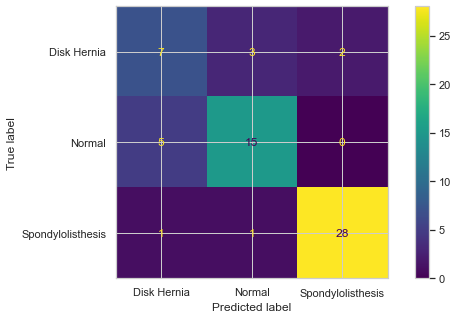

In [180]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_predito,
                                   labels=['Disk Hernia', 'Normal', 'Spondylolisthesis'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao,
                              display_labels=['Disk Hernia', 'Normal', 'Spondylolisthesis'])
disp.plot(values_format='d') 

In [181]:
print(classification_report(y_test, y_predito))


                   precision    recall  f1-score   support

      Disk Hernia       0.54      0.58      0.56        12
           Normal       0.79      0.75      0.77        20
Spondylolisthesis       0.93      0.93      0.93        30

         accuracy                           0.81        62
        macro avg       0.75      0.76      0.75        62
     weighted avg       0.81      0.81      0.81        62



### Testando o KNN com validação cruzada:

#### Incluindo a etapa de validação do modelo de knn:
Estamos fazendo a VALIDAÇÃO dos melhores hiperparâmetros do modelo de ML:

Idealmente, devemos ter 5 conjuntos de dados (treino, teste, validacao) ou usar a validação cruzada em cima dos dados de treino.



In [182]:
kfold  = KFold(n_splits=5, shuffle=True) # shuffle=True, Shuffle (embaralhar) os dados.
result = cross_val_score(modelo_classificador, x, y, cv = kfold)

print("K-Fold (R^2) Scores: {0}".format(result))
print("Mean R^2 for Cross-Validation K-Fold: {0}".format(result.mean()))

K-Fold (R^2) Scores: [0.74193548 0.83870968 0.83870968 0.83870968 0.8852459 ]
Mean R^2 for Cross-Validation K-Fold: 0.8286620835536753


A saída exibirá a precisão média do modelo (ou seja, a acurácia) com uma medida de variação associada (calculada pela multiplicação do desvio padrão por 2).

Escolhendo os melhores hiperparâmetros com validação cruzada:

In [183]:
error = [] #armazenar os erros

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

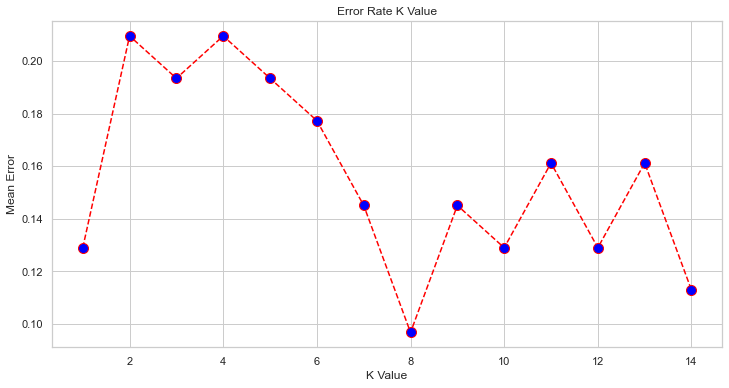

In [184]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### Buscar os melhores parâmetros

Vamos usar uma técnica chamada Gridsearch que é basicamente a busca por força bruta

Iremos utilizar a técnica de validação cruzada de 5 folds (divisões) em cima do conjunto de treinamento

Como métrica de melhor desemepnho usaremos a acurácia, isto é, estamos buscando os hiperparâmetros que maximizam a acurácia

In [185]:
# Parâmetros testados
param_grid = {'n_neighbors':[8,14], #total de vizinhos
              'weights': ['uniform', 'distance'], #Função de peso usada na previsão
              'metric':['cosine', 'euclidean', 'manhattan'] #métrica para cálculo da distância
             }

# Métrica de desempenho = melhor acurácia
gs_metric = make_scorer(accuracy_score, greater_is_better=True)

grid = GridSearchCV(KNeighborsClassifier(), 
                    param_grid=param_grid,
                    scoring=gs_metric,
                    cv=5, n_jobs=4, verbose=3) #cv = gerador de validação cruzada / n_jobs = determina a quantidade de jobs processados

grid.fit(x_train_scaled, y_train) #Selecionando os melhores hiperparametros com base nos dados de treino
knn_params = grid.best_params_
print('KNN', knn_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
KNN {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}


In [186]:
grid.cv_results_ #analisando todos os possíveis testes

{'mean_fit_time': array([0.00280437, 0.0015996 , 0.00174909, 0.00201974, 0.00227742,
        0.0024384 , 0.00241418, 0.00218182, 0.00320644, 0.00195765,
        0.00234723, 0.00248604]),
 'std_fit_time': array([0.00034603, 0.00029265, 0.00053086, 0.00013892, 0.0003596 ,
        0.0003479 , 0.00029534, 0.00036046, 0.00054742, 0.00032216,
        0.00047969, 0.00062174]),
 'mean_score_time': array([0.01274257, 0.00418487, 0.0109571 , 0.00409989, 0.00912347,
        0.00325232, 0.00952053, 0.00320716, 0.00927753, 0.00326385,
        0.00898013, 0.00303087]),
 'std_score_time': array([0.00199063, 0.00051641, 0.00063645, 0.00056382, 0.00068689,
        0.00038194, 0.00056782, 0.00065758, 0.00044114, 0.00040637,
        0.00082839, 0.00031804]),
 'param_metric': masked_array(data=['cosine', 'cosine', 'cosine', 'cosine', 'euclidean',
                    'euclidean', 'euclidean', 'euclidean', 'manhattan',
                    'manhattan', 'manhattan', 'manhattan'],
              mask=[False, Fa

### Testando vários tipos de algoritmos de classificação:

In [187]:
def AplicaValidacaoCruzada(x_axis, y_axis):
  # Linear Models.
  from sklearn.neighbors import KNeighborsClassifier  # k-vizinhos mais próximos (KNN)
  from sklearn.ensemble import RandomForestClassifier # RandomForest
  from sklearn.svm import SVC                         # Maquina de Vetor Suporte SVM

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # Configuração de KFold.
  kfold  = KFold(n_splits=10, shuffle=True) 

  # Axis
  x = x_axis
  y = y_axis

  # Criando os modelos

  # KNN
  knn = KNeighborsClassifier(n_neighbors=8, metric= 'euclidean', weights='distance') 
  knn.fit(x_train_scaled, y_train) 

  # SVM
  svm = SVC()
  svm.fit(x_train_scaled, y_train)

  # RandomForest
  rf = RandomForestClassifier(random_state=7) 
  rf.fit(x_train_scaled, y_train) 

  # Applyes KFold to models.
  knn_result = cross_val_score(knn, x, y, cv = kfold)
  svm_result = cross_val_score(svm, x, y, cv = kfold)
  rf_result = cross_val_score(rf, x, y, cv = kfold)

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "KNN": knn_result.mean(),
    "SVM": svm_result.mean(),
    "RF": rf_result.mean()
  }
  # Select the best model.
  melhorModelo = max(dic_models, key=dic_models.get)

  print("KNN (R^2): {0}\nSVM (R^2): {1}\nRandom Forest (R^2): {2}".format(knn_result.mean(), svm_result.mean(), rf_result.mean()))
  print("O melhor modelo é : {0} com o valor: {1}".format(melhorModelo, dic_models[melhorModelo]))

In [188]:
AplicaValidacaoCruzada(x, y)

KNN (R^2): 0.8476344086021506
SVM (R^2): 0.8676344086021505
Random Forest (R^2): 0.8512903225806452
O melhor modelo é : SVM com o valor: 0.8676344086021505


***

## AULA 06 - CLASSIFICATION REPORT E MÉTRICAS DE CLASSIFICAÇÃO

Fraude de cartão de crédito
Fonte de Dados:
Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.

De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.

No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio.

Explicação do das variáveis:
distancefromhome - a distância de casa onde a transação aconteceu.

distancefromlast_transaction - a distância da última transação aconteceu.

ratiotomedianpurchaseprice - Razão da transação do preço de compra para o preço de compra mediano.

repeat_retailer - É a transação que aconteceu do mesmo varejista.

used_chip - É a transação através de chip (cartão de crédito).

usedpinnumber - A transação aconteceu usando o número PIN.

online_order - A transação é um pedido online.

fraude - A transação é fraudulenta

### Reading data

In [189]:
dados = pd.read_csv('../data/card_transdata.csv', sep=',') 
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [190]:
dados.shape

(1000000, 8)

Tratando inconsistências na base

In [191]:
dados = dados.dropna()

### Análise exploratória dos dados

In [192]:
dados.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
#Número de transações fraudulentas
dados[dados["fraud"] == 1].fraud.count() #filtro com contagem dos dados

87403

In [194]:
Total = len(dados)
Total

1000000

In [195]:
Total = len(dados)
TotalNaoFraudes = dados[dados["fraud"] == 0].fraud.count()
TotalFraudes = dados[dados["fraud"] == 1].fraud.count()

Percentual_Fraudes = TotalFraudes / Total 

print("Total de dados: ", Total)
print("Total de não fraudes: ", TotalNaoFraudes)
print("Total de fraudes: ", TotalFraudes)
print("Percentual de fraudes na base: ", (round(Percentual_Fraudes, 2)*100), "%")

Total de dados:  1000000
Total de não fraudes:  912597
Total de fraudes:  87403
Percentual de fraudes na base:  9.0 %


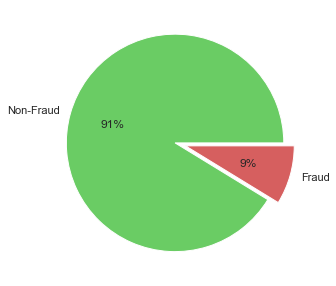

In [196]:
categororias = ["Non-Fraud", "Fraud"]
plt.pie(dados["fraud"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

In [197]:
dados_fraudes = dados[dados["fraud"] == 1]
dados_fraudes.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [198]:
dados_fraudes.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='online_order', ylabel='count'>

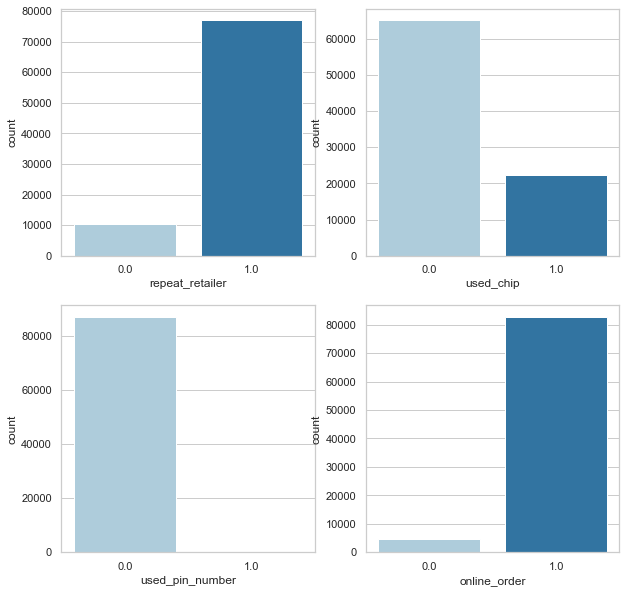

In [199]:
plt.figure(figsize = (10,10)) #Configurando o tamanho da visualização

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Paired", data = dados_fraudes) #Aconteceu no mesmo varejista?

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Paired", data = dados_fraudes) #Uso de cartão de crédito?

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Paired", data = dados_fraudes) #Utilizou o mesmo número de PIN?

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Paired", data = dados_fraudes) #Foi em uma compra online?

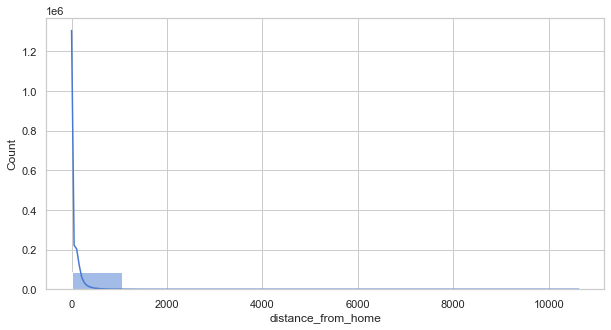

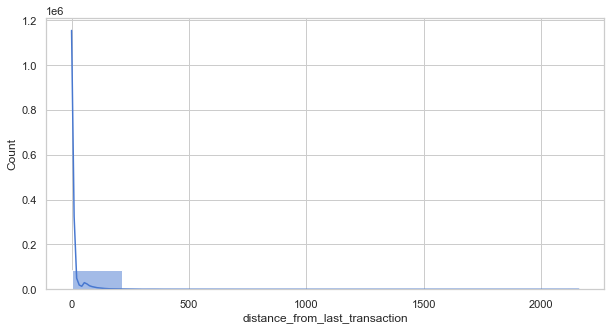

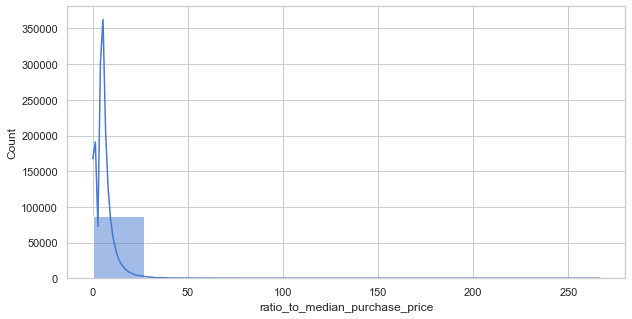

In [200]:
Colunas_Numericas = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [201]:
for column in [0, 1, 2]:
    dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma

C:\Users\refelipe\AppData\Local\Temp\ipykernel_16536\2390613773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma
C:\Users\refelipe\AppData\Local\Temp\ipykernel_16536\2390613773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_fraudes.iloc[:, column] = np.log10(dados_fraudes.iloc[:, column]) #transformação logarítma
C:\Users\refelipe\AppData\Local\Temp\ipykernel_16536\2390613773.py:2: SettingWithCopyW

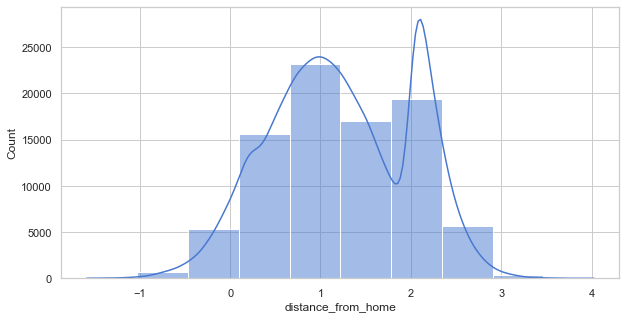

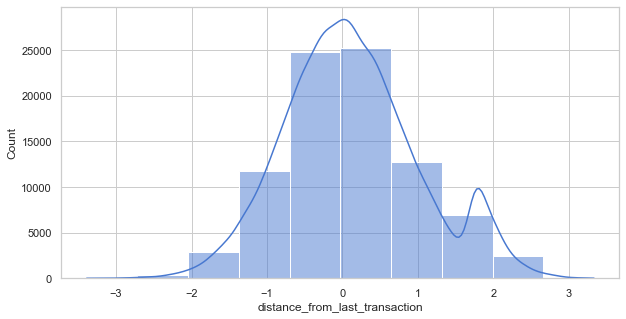

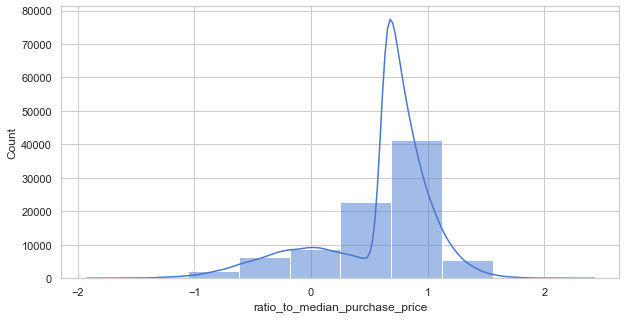

In [202]:
Colunas_Numericas_Normal = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
for column in Colunas_Numericas_Normal:
    plt.figure()
    plot = dados_fraudes[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

In [203]:
round(dados_fraudes.distance_from_last_transaction.mean(),2)

0.13

In [204]:
round(dados_fraudes.distance_from_last_transaction.std(),2)

0.9

<AxesSubplot:>

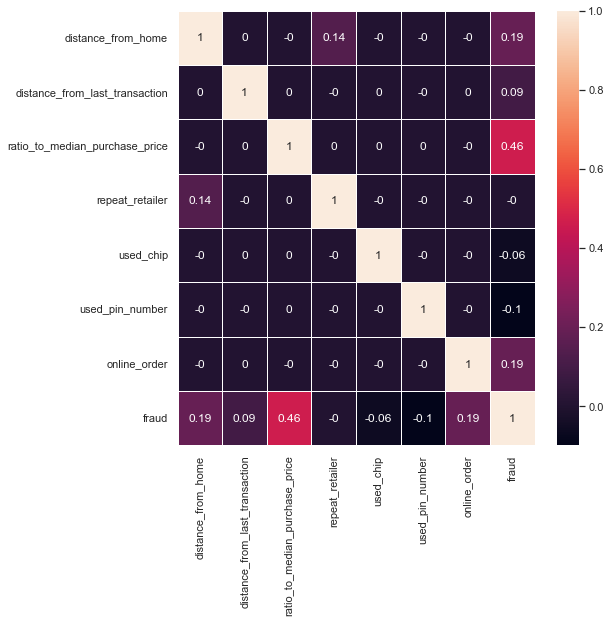

In [205]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Criação do modelo de Machine Learming

Separação da base de treino e teste

In [206]:
x = dados[['distance_from_home','ratio_to_median_purchase_price', 'online_order']]
y = dados['fraud'] #target

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7) #20% para teste e 80% de treino

Feature Engineer
Comparação da escala normal das variáveis vs. escalonamento das variáveis

- Comparação do real x dados transformado (normalização e padronização)
- padronização: zera a média e deixa o desvio padrão unitário.( obteremos desvios-padrão menores por meio do processo de normalização minmaxscaler).
- normalização: coloca a variável na escala entre 0 até 1.
- Análise da plotagem real e verificar se está muito diferente da plotagem com standerscaler e minmaxsclaer.
- Escolha o tipo de transformação de escala que melhor se adequa a suas variáveis. Se o desenho do gráfico mudar, você está descaracterizando o dado.

Transformar e normlaizar a escala das variáveis.

In [208]:
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
scaler.fit(x_train)

MinMaxScaler()

In [209]:
# Na hora de transformar, devemos transformar ambos os conjuntos
x_train_escalonado = scaler.transform(x_train)#treino
x_test_escalonado = scaler.transform(x_test)#teste

In [210]:
x_train

,distance_from_home,ratio_to_median_purchase_price,online_order
459304,47.575388,0.992054,0.0
913193,28.754925,5.108844,1.0
278587,3.124923,2.124761,1.0
521682,21.042733,1.545996,1.0
293018,6.354463,0.320672,1.0
...,...,...,...
871097,10.965039,4.241274,1.0
932655,8.551129,0.700205,1.0
430609,3.765416,1.960024,0.0
246177,5.609825,23.143594,0.0


In [211]:
x_train_escalonado

array([[4.47397457e-03, 3.68805271e-03, 0.00000000e+00],
       [2.70392280e-03, 1.90607654e-02, 1.00000000e+00],
       [2.93438485e-04, 7.91775122e-03, 1.00000000e+00],
       ...,
       [3.53676362e-04, 7.30259599e-03, 0.00000000e+00],
       [5.27141795e-04, 8.64052299e-02, 0.00000000e+00],
       [9.41482438e-04, 3.40812710e-02, 0.00000000e+00]])

### Configurando o modelo

In [212]:

error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\refelipe\AppData

Text(0, 0.5, 'Mean Error')

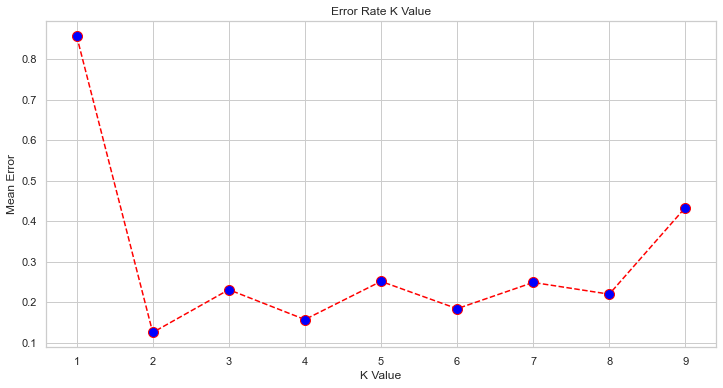

In [213]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [214]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

In [215]:
# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train_escalonado, y_train)

KNeighborsClassifier()

In [216]:
y_predito = modelo_classificador.predict(x_test_escalonado) #defininfo as predições

Checando questões de overfitting and underfitting:

In [217]:
print('Training set score: {:.4f}'.format(modelo_classificador.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(modelo_classificador.score(x_test, y_test)))

C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Training set score: 0.7467


C:\Users\refelipe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Test set score: 0.7486


### Analisando resultados

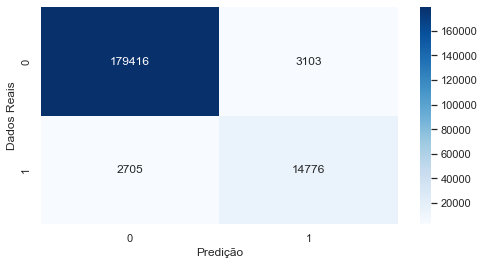

In [218]:
matriz_confusao = confusion_matrix(y_test, y_predito)
plt.figure(figsize = (8, 4))
sns.heatmap(matriz_confusao, annot = True, fmt="d",cmap = "Blues")
plt.xlabel("Predição");
plt.ylabel("Dados Reais");

In [219]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    182519
         1.0       0.83      0.85      0.84     17481

    accuracy                           0.97    200000
   macro avg       0.91      0.91      0.91    200000
weighted avg       0.97      0.97      0.97    200000



## AULA 07 - AUC Score e ROC Curve

In [221]:
dados = pd.read_excel('../data/Recrutamento.xlsx')

In [223]:
y_prob = modelo_classificador.predict_proba(x_test_escalonado)[:,1]

In [224]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9584203597080031

In [227]:
print(classification_report(y_test, y_predito))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    182519
         1.0       0.83      0.85      0.84     17481

    accuracy                           0.97    200000
   macro avg       0.91      0.91      0.91    200000
weighted avg       0.97      0.97      0.97    200000



Text(0.5, 0, 'False Positive Rate')

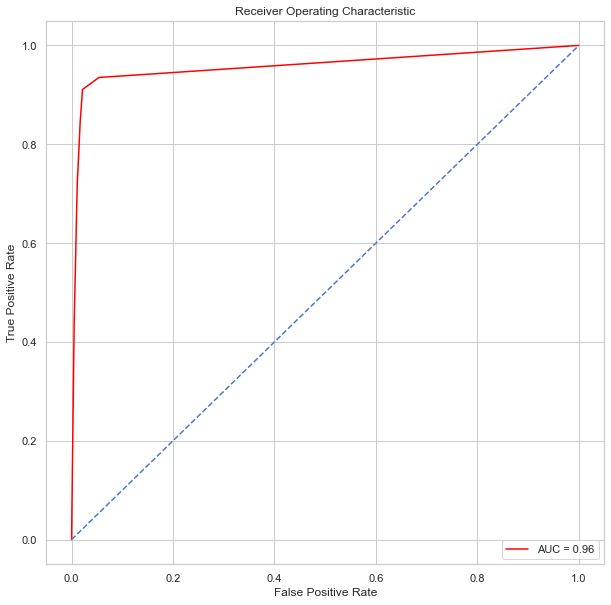

In [225]:
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')